In [1]:
import GPy, scipy, patsy
from gpmultipy import dataset

In [2]:
%pylab

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [3]:
%matplotlib inline

In [4]:
ds = dataset.DataSet('data/')
x,y,effect,labels = ds.build(Strain='ura3',mM_PQ=0.0,scale='range',effects=['Well'])
y = np.log2(y)
y = (y-y.mean())/y.std()

In [5]:
edge = range(101,111) + range(111,191,10) + range(120,191,10) + range(191,201) + range(201,211) + range(211,291,10) + range(220,291,10) + range(291,301)
edge = np.array(edge)
edge

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 121, 131,
       141, 151, 161, 171, 181, 120, 130, 140, 150, 160, 170, 180, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
       204, 205, 206, 207, 208, 209, 210, 211, 221, 231, 241, 251, 261,
       271, 281, 220, 230, 240, 250, 260, 270, 280, 290, 291, 292, 293,
       294, 295, 296, 297, 298, 299, 300])

In [6]:
dist = np.array([min(abs(l-edge)) for l in labels[0]])
position = (dist==0).astype(int)

In [7]:
xgp = np.zeros((x.shape[0]*y.shape[1], 2))
xgp[:,0] = np.tile(x[:,0], y.shape[1])
xgp[:,1] = np.repeat(position, x.shape[0])

ygp = y.ravel(1)[:,None]

xgp = xgp[::10]
ygp = ygp[::10]

xgp.shape

(1624, 2)

In [15]:
# k = GPy.kern.RBF(2, ARD=True)
k = GPy.kern.RBF(1,name='time')*GPy.kern.RBF(1,name='edge',active_dims=[1])

m = GPy.models.GPRegression(xgp,ygp,k)
m

GP_regression.,value,constraints,priors
mul.time.variance,1.0,+ve,
mul.time.lengthscale,1.0,+ve,
mul.edge.variance,1.0,+ve,
mul.edge.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


In [16]:
m.optimize()
m

GP_regression.,value,constraints,priors
mul.time.variance,1.0972456847,+ve,
mul.time.lengthscale,0.227946715046,+ve,
mul.edge.variance,1.0972456847,+ve,
mul.edge.lengthscale,4.03683276676,+ve,
Gaussian_noise.variance,0.0295743153971,+ve,


In [18]:
k

mul.,value,constraints,priors
time.variance,1.0972456847,+ve,
time.lengthscale,0.227946715046,+ve,
edge.variance,1.0972456847,+ve,
edge.lengthscale,4.03683276676,+ve,


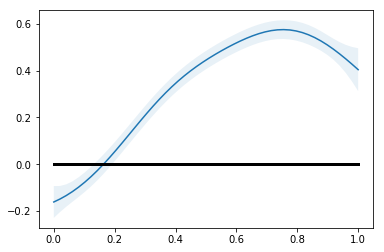

In [19]:
xpred = np.zeros((100,2))
xpred[:50,0] = xpred[50:,0] = np.linspace(x.min(),x.max())
xpred[50:,1] = 1

mu,cov = m.predict_noiseless(xpred,full_cov=True)

op = np.zeros((50,100))
for i in range(50):
    op[i,i] = 1
    op[i,i+50] = -1
    
mu = np.dot(op,mu)[:,0]
cov = np.dot(op,np.dot(cov,op.T))

plt.plot(xpred[:50,0],mu)
plt.fill_between(xpred[:50,0],mu+1.96*np.sqrt(cov.diagonal()),mu-1.96*np.sqrt(cov.diagonal()),alpha=.1)
plt.plot([x.min(),x.max()],[0,0],'k',lw=3)

In [20]:
cov = k.K(xpred)
cov = np.dot(op,np.dot(cov,op.T))

np.sqrt(cov.diagonal()*1.96)

array([ 0.37763165,  0.37763165,  0.37763165,  0.37763165,  0.37763165,
        0.37763165,  0.37763165,  0.37763165,  0.37763165,  0.37763165,
        0.37763165,  0.37763165,  0.37763165,  0.37763165,  0.37763165,
        0.37763165,  0.37763165,  0.37763165,  0.37763165,  0.37763165,
        0.37763165,  0.37763165,  0.37763165,  0.37763165,  0.37763165,
        0.37763165,  0.37763165,  0.37763165,  0.37763165,  0.37763165,
        0.37763165,  0.37763165,  0.37763165,  0.37763165,  0.37763165,
        0.37763165,  0.37763165,  0.37763165,  0.37763165,  0.37763165,
        0.37763165,  0.37763165,  0.37763165,  0.37763165,  0.37763165,
        0.37763165,  0.37763165,  0.37763165,  0.37763165,  0.37763165])

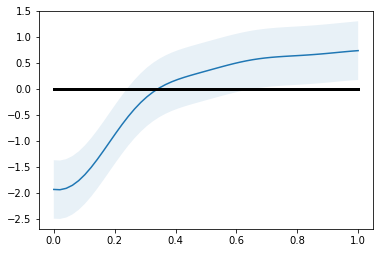

In [22]:
xpred = np.zeros((50,2))
xpred[:,0] = np.linspace(x.min(),x.max())
# xpred[50:,1] = 1

mu,cov = m.predict_noiseless(xpred,full_cov=True,kern=k.time)
mu = mu[:,0]

plt.plot(xpred[:50,0],mu)
plt.fill_between(xpred[:50,0],mu+1.96*np.sqrt(cov.diagonal()),mu-1.96*np.sqrt(cov.diagonal()),alpha=.1)
plt.plot([x.min(),x.max()],[0,0],'k',lw=3)